In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
%matplotlib inline

from IPython.display import display

In [2]:
PATH = os.path.abspath('..')

# Load in catalogs

In [3]:
# load in all products
preds = pd.read_csv(f'{PATH}/catalogs/predictions-oh_p50.csv', index_col=0)
inds = preds.index

full_df = pd.read_csv(f'{PATH}/catalogs/SDSSspecgalsDR14_boada.csv', index_col=0)
full_df = full_df.loc[inds].drop_duplicates()

In [4]:
display(full_df.describe())
display(preds.describe())

,specObjID,ra,dec,z,zErr,velDisp,velDispErr,modelMag_u,modelMagErr_u,modelMag_g,...,d4000,d4000_err,bptclass,oh_p2p5,oh_p16,oh_p50,oh_p84,oh_p97p5,lgm_tot_p50,sfr_tot_p50
count,2.046700e+04,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000,...,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000
mean,1.661916e+18,184.536374,24.887878,0.077029,0.000009,75.549014,21.380513,18.913363,0.043509,17.665191,...,1.420650,0.022471,0.998534,8.806661,8.857076,8.905743,8.950468,8.992479,8.053131,0.155682
std,8.360647e+17,59.535196,18.932095,0.039442,0.000004,55.120285,25.198336,0.713774,0.031934,0.684137,...,0.135274,0.011485,0.054125,0.268275,0.232733,0.200184,0.179847,0.172914,139.915449,0.556730
min,2.995007e+17,0.168292,-11.182179,0.020014,0.000003,0.000000,-3.000000,14.381130,0.006183,13.886560,...,0.000000,0.000000,-1.000000,7.736374,7.835169,7.896335,7.989066,8.057620,-9999.000000,-4.296250
25%,9.300912e+17,150.752027,9.704798,0.047410,0.000007,46.941825,12.183475,18.536570,0.029249,17.325245,...,1.337840,0.014743,1.000000,8.700136,8.744190,8.808639,8.845257,8.879231,9.639667,-0.189512
50%,1.616832e+18,185.095898,23.161765,0.070862,0.000009,72.477320,16.653120,19.026430,0.039504,17.832370,...,1.408069,0.019888,1.000000,8.878203,8.925783,8.955670,8.991926,9.016858,10.058100,0.171191
75%,2.370139e+18,220.728231,39.120015,0.098006,0.000011,100.155050,24.008630,19.386805,0.052382,18.153095,...,1.493062,0.027343,1.000000,8.992717,9.014799,9.054213,9.085104,9.117371,10.415375,0.527011
max,3.348596e+18,359.976476,69.908206,0.364123,0.000130,850.000000,1600.000000,23.692340,1.704621,22.461750,...,3.873904,0.302199,1.000000,9.404011,9.443880,9.465558,9.475378,9.479278,12.492280,3.875005


,oh_p50,prediction
count,20466.000000,20466.000000
mean,8.905734,8.907569
std,0.200185,0.174790
min,7.896335,8.129671
25%,8.808609,8.816445
50%,8.955654,8.957441
75%,9.054208,9.039455
max,9.465558,9.199911


In [5]:
display(full_df.head())
display(preds.head())

,specObjID,ra,dec,z,zErr,velDisp,velDispErr,modelMag_u,modelMagErr_u,modelMag_g,...,d4000,d4000_err,bptclass,oh_p2p5,oh_p16,oh_p50,oh_p84,oh_p97p5,lgm_tot_p50,sfr_tot_p50
objID,,,,,,,,,,,,,,,,,,,,,
1237658493878337647,1392840760562313216,153.065673,9.393589,0.052860,0.000010,0.00000,100.59110,19.24347,0.053739,17.83226,...,1.393617,0.034535,1,8.164732,8.378000,8.577997,8.680438,8.748820,9.410803,-0.398485
1237665330918850673,2240661544268490752,165.432551,31.554196,0.034537,0.000007,42.24826,12.03756,17.99890,0.026781,16.42890,...,1.403976,0.014674,1,8.653717,8.701375,8.726439,8.756987,8.824885,9.542205,-0.178529
1237657630582178125,928874883251726336,123.488570,33.123225,0.111484,0.000007,99.12975,21.82991,18.67058,0.030337,17.70349,...,1.306892,0.015236,1,8.899887,8.938868,8.948060,8.956317,8.959596,10.287520,0.875822
1237651250411405534,501053527515228160,130.248831,50.149482,0.156886,0.000017,162.45530,15.42012,20.12226,0.137734,18.44958,...,1.675999,0.027175,1,8.725135,8.819554,8.894798,8.962484,9.010794,10.776900,0.403948
1237674651536261211,317593961499748352,173.030116,0.910884,0.029602,0.000011,51.42912,33.51934,19.09125,0.073329,17.66509,...,1.621131,0.065915,1,8.077692,8.181426,8.333275,8.494060,8.608570,8.885455,-0.606143


,oh_p50,prediction
objID,,
1237658493878337647,8.577997,8.696861
1237665330918850673,8.726439,8.757436
1237657630582178125,8.948060,9.024221
1237651250411405534,8.894798,9.015285
1237674651536261211,8.333275,8.544479


In [6]:
df = preds.join(full_df[['z', 'lgm_tot_p50', 'sfr_tot_p50']], how='left')
df.describe()

,oh_p50,prediction,z,lgm_tot_p50,sfr_tot_p50
count,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000
mean,8.905744,8.907578,0.077029,8.053131,0.155682
std,0.200184,0.174790,0.039442,139.915449,0.556730
min,7.896335,8.129671,0.020014,-9999.000000,-4.296250
25%,8.808639,8.816448,0.047410,9.639667,-0.189512
50%,8.955670,8.957461,0.070862,10.058100,0.171191
75%,9.054213,9.039458,0.098006,10.415375,0.527011
max,9.465558,9.199911,0.364123,12.492280,3.875005


In [7]:
# only select reasonably high-mass objects
df = df[df.lgm_tot_p50 > 8.5].copy()
df.describe()

,oh_p50,prediction,z,lgm_tot_p50,sfr_tot_p50
count,20364.000000,20364.000000,20364.000000,20364.000000,20364.000000
mean,8.908361,8.910001,0.077244,10.017997,0.161179
std,0.196256,0.170979,0.039306,0.548923,0.546785
min,7.975870,8.177104,0.020014,8.509598,-2.562046
25%,8.810425,8.818863,0.047707,9.647541,-0.181594
50%,8.956622,8.958210,0.071059,10.062150,0.174398
75%,9.054462,9.039713,0.098198,10.417260,0.528459
max,9.465558,9.199911,0.314083,12.492280,3.875005


## How good is the predicted metallicity?

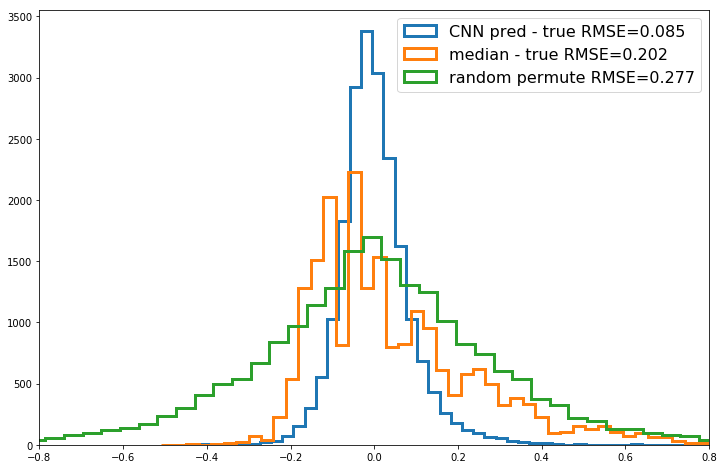

In [8]:
metal_rmse = np.sqrt(np.mean((df.prediction - df.oh_p50)**2))

median_pred_rmse = np.sqrt(np.mean((np.median(df.oh_p50) - df.oh_p50)**2))

randomized_metals = df.oh_p50 - np.random.permutation(df.oh_p50)
rand_pred_rmse = np.sqrt(np.mean((randomized_metals)**2))

plt.figure(figsize=(12, 8))
plt.hist(df.prediction - df.oh_p50, bins=50, histtype='step', align='mid', lw=3, label=f'CNN pred - true RMSE={metal_rmse:.3f}')
plt.hist(np.median(df.oh_p50) - df.oh_p50, bins=50, histtype='step', lw=3, align='mid', label=f'median - true RMSE={median_pred_rmse:.3f}')
plt.hist(randomized_metals, bins=50, histtype='step', lw=3, align='mid', label=f'random permute RMSE={rand_pred_rmse:.3f}')

plt.xlim(-0.8, 0.8)
plt.legend(fontsize=16)

# Plot mass-metallicity

Aka replicate Tremonti et al. (2004)

## Data

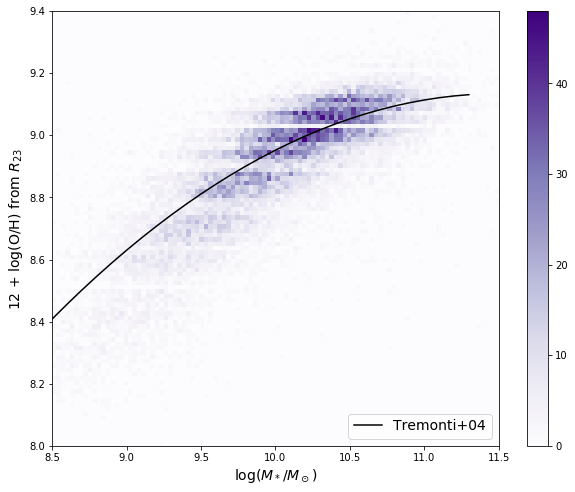

In [9]:
plt.figure(figsize=(10, 8))
*_, im = plt.hist2d(df.lgm_tot_p50, df.oh_p50, bins=100, range=([8.5, 11.5], [8.0, 9.4]), cmap='Purples')
plt.colorbar(im)

# Tremonti+04 equation 3
logm_bins = np.arange(8.5, 11.3, 0.1)
mmr = lambda logm: -1.492 + 1.847*logm -0.08026*logm**2
plt.plot(logm_bins, mmr(logm_bins), c='k', label='Tremonti+04')

plt.xlabel('log($M_*/M_\odot$)', fontsize=14)
plt.ylabel('12 + log(O/H) from $R_{23}$', fontsize=14)

plt.legend(loc='lower right', fontsize=14)

## Repeat but with our predictions

This will be interesting: if the CNN-predicted relation appears to be tighter than the $R_{23}$ data that it was trained on, then perhaps there is some information in the morphology that is needed to predict metallicity, despite not being captured in the [O II], [O III], and H$\beta$ lines.

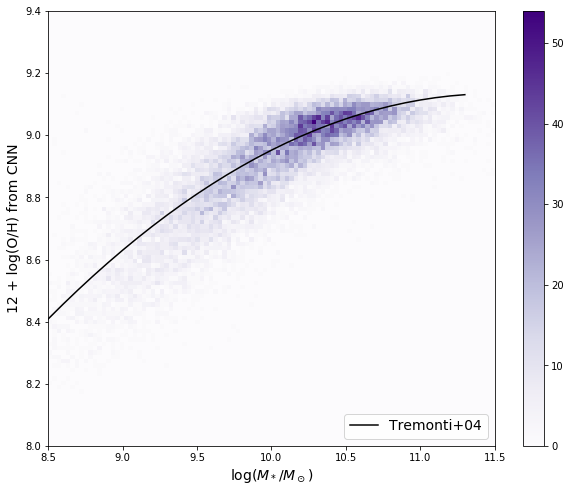

In [10]:
plt.figure(figsize=(10, 8))
*_, im = plt.hist2d(df.lgm_tot_p50, df.prediction, bins=100, range=([8.5, 11.5], [8.0, 9.4]), cmap='Purples')
plt.colorbar(im)

# Tremonti+04 equation 3
logm_bins = np.arange(8.5, 11.3, 0.1)
mmr = lambda logm: -1.492 + 1.847*logm -0.08026*logm**2
plt.plot(logm_bins, mmr(logm_bins), c='k', label='Tremonti+04')

plt.xlabel('log($M_*/M_\odot$)', fontsize=14)
plt.ylabel('12 + log(O/H) from CNN', fontsize=14)

plt.legend(loc='lower right', fontsize=14)

## Side by side comparison

No handles with labels found to put in legend.


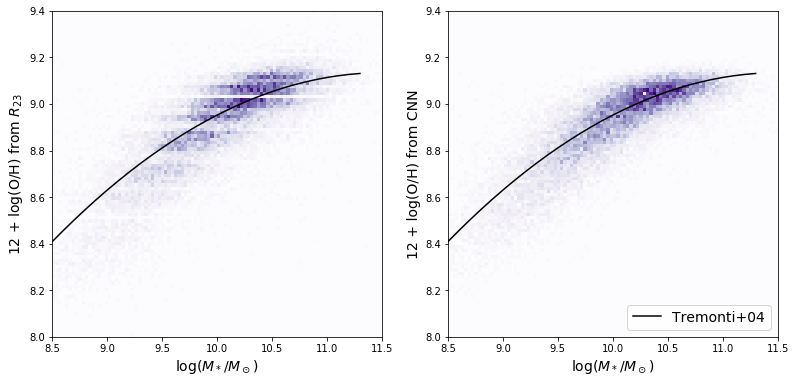

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 6))
*_, im = ax1.hist2d(df.lgm_tot_p50, df.oh_p50, bins=100, range=([8.5, 11.5], [8.0, 9.4]), cmin=0, cmax=50, cmap='Purples')

# Tremonti+04 equation 3
logm_bins = np.arange(8.5, 11.3, 0.1)
mmr = lambda logm: -1.492 + 1.847*logm -0.08026*logm**2
ax1.plot(logm_bins, mmr(logm_bins), c='k')


ax1.set_xlabel('log($M_*/M_\odot$)', fontsize=14)
ax1.set_ylabel('12 + log(O/H) from $R_{23}$', fontsize=14)

plt.legend(loc='lower right', fontsize=14)

*_, im = ax2.hist2d(df.lgm_tot_p50, df.prediction, bins=100, range=([8.5, 11.5], [8.0, 9.4]), cmin=0, cmax=50, cmap='Purples')

ax2.plot(logm_bins, mmr(logm_bins), c='k', label='Tremonti+04')
ax2.set_xlabel('log($M_*/M_\odot$)', fontsize=14)
plt.ylabel('12 + log(O/H) from CNN', fontsize=14)

plt.legend(loc='lower right', fontsize=14)

### Use outlier-insensitive metric for scatter, such as NMAD.

In [12]:
mad = lambda x: np.median(np.abs(x - np.median(x)))

def nmad(z, const=1.4826):
    """Returns the Gaussian sigma according to MAD"""
    return const*mad(z)


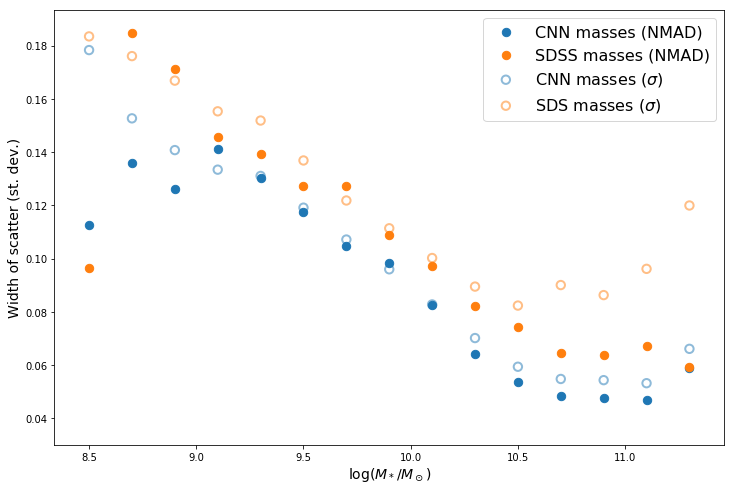

In [13]:
mass_bins = np.arange(8.5, 11.5, 0.2)
oh_pred_nmad = [nmad(df.prediction[(df.lgm_tot_p50 < m+0.1) & (df.lgm_tot_p50 > m-0.1)]) for m in mass_bins]
oh_sdss_nmad = [nmad(df.oh_p50[(df.lgm_tot_p50 < m+0.1) & (df.lgm_tot_p50 > m-0.1)]) for m in mass_bins]

oh_pred_sigma = [np.std(df.prediction[(df.lgm_tot_p50 < m+0.1) & (df.lgm_tot_p50 > m-0.1)]) for m in mass_bins]
oh_sdss_sigma = [np.std(df.oh_p50[(df.lgm_tot_p50 < m+0.1) & (df.lgm_tot_p50 > m-0.1)]) for m in mass_bins]

plt.figure(figsize=(12, 8))
plt.scatter(mass_bins, oh_pred_nmad, label='CNN masses (NMAD)', c='C0', s=70)
plt.scatter(mass_bins, oh_sdss_nmad, label='SDSS masses (NMAD)', c='C1', s=70)
plt.scatter(mass_bins, oh_pred_sigma, label='CNN masses ($\sigma$)', edgecolors='C0', linewidths=2, marker='o', facecolors='none', s=70, alpha=0.5)
plt.scatter(mass_bins, oh_sdss_sigma, label='SDS masses ($\sigma$)', edgecolors='C1', linewidths=2, marker='o', facecolors='none', s=70, alpha=0.5)


plt.legend(fontsize=16)
plt.xlabel('log($M_*/M_\odot$)', fontsize=14)
plt.ylabel('Width of scatter (st. dev.)', fontsize=14);

### Check scatter in $\Delta$ (= predicted - true) metallicity

In [14]:
print(f'Standard deviation in delta metallicity: {np.std(df.prediction - df.oh_p50 ):.4f}')
print(f'NMAD in delta metallicity: {nmad(df.prediction - df.oh_p50 ):.4f}')

Standard deviation in delta metallicity: 0.0849
NMAD in delta metallicity: 0.0666


## Results: we can beat the MMR in terms of scatter

Ths is remarkable because we are finding a **tighter** correlation between a CNN-predicted 12+log(O/H) and spectroscopically-derived mass than from both quantities derived from spectroscopy.

## Steven's test: remove "outliers"
Remove the high deviation predictions from the entire dataframe. That way, the distributions of spectroscopic and predicted 12+log(O/H) should be similar.

### Outliers still in:

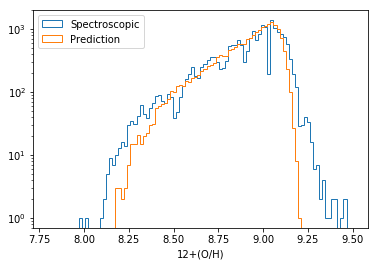

In [15]:
plt.hist(df.oh_p50, range=[7.8, 9.5], bins=100, histtype='step', label='Spectroscopic')
plt.hist(df.prediction, range=[7.8, 9.5], bins=100, histtype='step', label='Prediction')

plt.xlabel(r'12+(O/H)')
plt.yscale('log')
plt.legend(loc='upper left');

### Outliers removed: $N$ sigma cut

In [16]:
mean_rmse = 0.085
df_tight = df[np.abs(df.oh_p50 - df.prediction) < 1*mean_rmse]
df_tight.describe()

,oh_p50,prediction,z,lgm_tot_p50,sfr_tot_p50
count,15537.000000,15537.000000,15537.000000,15537.000000,15537.000000
mean,8.941666,8.936309,0.080549,10.090716,0.227865
std,0.162853,0.154644,0.038718,0.508870,0.513718
min,8.141025,8.177104,0.020077,8.517160,-2.371827
25%,8.855869,8.860542,0.052085,9.756926,-0.087125
50%,8.985425,8.981038,0.074345,10.137290,0.236170
75%,9.062400,9.049678,0.102012,10.458320,0.570222
max,9.263840,9.199911,0.289931,12.492280,3.875005


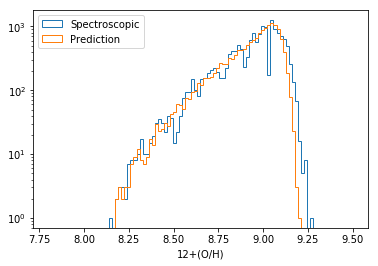

In [17]:
plt.hist(df_tight.oh_p50, range=[7.8, 9.5], bins=100, histtype='step', label='Spectroscopic')
plt.hist(df_tight.prediction, range=[7.8, 9.5], bins=100, histtype='step', label='Prediction')

plt.xlabel(r'12+(O/H)')
plt.yscale('log')
plt.legend(loc='upper left');

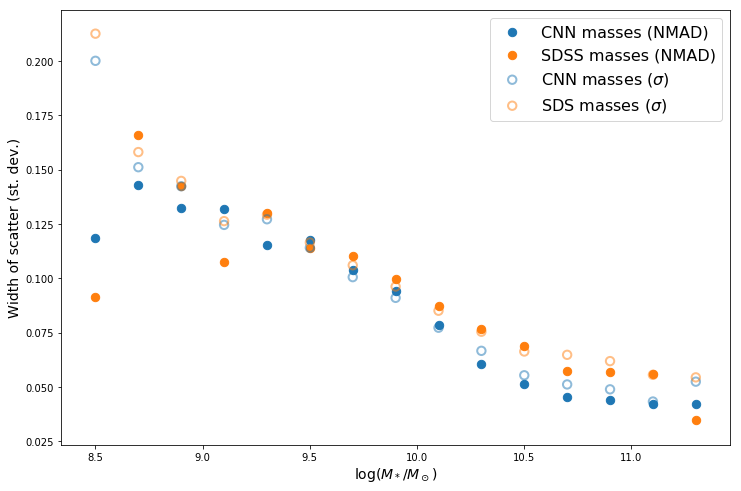

In [18]:
mass_bins = np.arange(8.5, 11.5, 0.2)
oh_pred_nmad = [nmad(df_tight.prediction[(df_tight.lgm_tot_p50 < m+0.1) & (df_tight.lgm_tot_p50 > m-0.1)]) for m in mass_bins]
oh_sdss_nmad = [nmad(df_tight.oh_p50[(df_tight.lgm_tot_p50 < m+0.1) & (df_tight.lgm_tot_p50 > m-0.1)]) for m in mass_bins]

oh_pred_sigma = [np.std(df_tight.prediction[(df_tight.lgm_tot_p50 < m+0.1) & (df_tight.lgm_tot_p50 > m-0.1)]) for m in mass_bins]
oh_sdss_sigma = [np.std(df_tight.oh_p50[(df_tight.lgm_tot_p50 < m+0.1) & (df_tight.lgm_tot_p50 > m-0.1)]) for m in mass_bins]

plt.figure(figsize=(12, 8))
plt.scatter(mass_bins, oh_pred_nmad, label='CNN masses (NMAD)', c='C0', s=70)
plt.scatter(mass_bins, oh_sdss_nmad, label='SDSS masses (NMAD)', c='C1', s=70)
plt.scatter(mass_bins, oh_pred_sigma, label='CNN masses ($\sigma$)', edgecolors='C0', linewidths=2, marker='o', facecolors='none', s=70, alpha=0.5)
plt.scatter(mass_bins, oh_sdss_sigma, label='SDS masses ($\sigma$)', edgecolors='C1', linewidths=2, marker='o', facecolors='none', s=70, alpha=0.5)


plt.legend(fontsize=16)
plt.xlabel('log($M_*/M_\odot$)', fontsize=14)
plt.ylabel('Width of scatter (st. dev.)', fontsize=14);

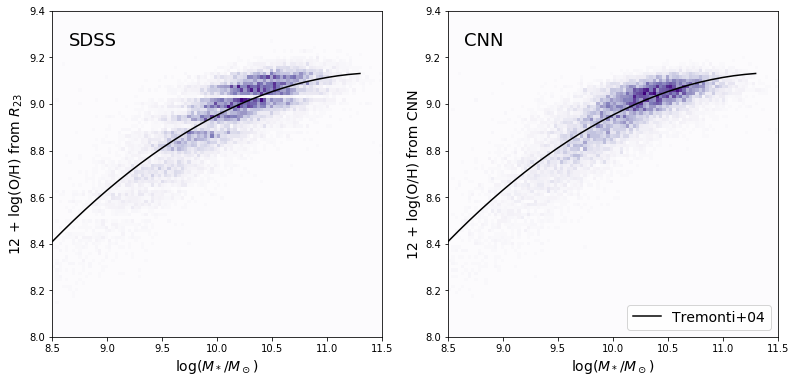

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 6))
*_, im = ax1.hist2d(df_tight.lgm_tot_p50, df_tight.oh_p50, bins=100, range=([8.5, 11.5], [8.0, 9.4]), cmin=0, cmax=50, cmap='Purples')

# Tremonti+04 equation 3
logm_bins = np.arange(8.5, 11.3, 0.1)
mmr = lambda logm: -1.492 + 1.847*logm -0.08026*logm**2
ax1.plot(logm_bins, mmr(logm_bins), c='k')

ax1.text(8.65, 9.25, 'SDSS', fontsize=18)

ax1.set_xlabel('log($M_*/M_\odot$)', fontsize=14)
ax1.set_ylabel('12 + log(O/H) from $R_{23}$', fontsize=14)


*_, im = ax2.hist2d(df_tight.lgm_tot_p50, df_tight.prediction, bins=100, range=([8.5, 11.5], [8.0, 9.4]), cmin=0, cmax=50, cmap='Purples')

ax2.plot(logm_bins, mmr(logm_bins), c='k', label='Tremonti+04')

ax2.text(8.65, 9.25, 'CNN', fontsize=18)

ax2.set_xlabel('log($M_*/M_\odot$)', fontsize=14)
plt.ylabel('12 + log(O/H) from CNN', fontsize=14)

plt.legend(loc='lower right', fontsize=14)

plt.savefig('MMR_predicting-metallicity.png', dpi=200)

## Outliers removed: hard cut

In [20]:
df_tight = df[(df.oh_p50 > 8.25) & (df.oh_p50 < 9.15)]
df_tight.describe()

,oh_p50,prediction,z,lgm_tot_p50,sfr_tot_p50
count,19631.000000,19631.000000,19631.000000,19631.000000,19631.000000
mean,8.902496,8.906272,0.076757,10.001422,0.143616
std,0.186675,0.166534,0.038591,0.535428,0.533852
min,8.250810,8.187387,0.020014,8.509598,-2.562046
25%,8.807299,8.815413,0.047696,9.638858,-0.191572
50%,8.951406,8.952250,0.070831,10.043290,0.159271
75%,9.049978,9.034529,0.097513,10.391440,0.501479
max,9.149965,9.180563,0.314083,12.492280,3.875005


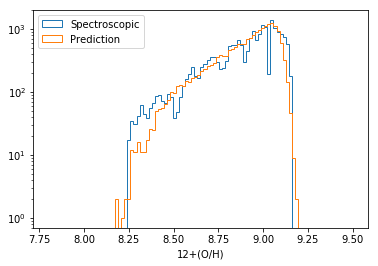

In [21]:
plt.hist(df_tight.oh_p50, range=[7.8, 9.5], bins=100, histtype='step', label='Spectroscopic')
plt.hist(df_tight.prediction, range=[7.8, 9.5], bins=100, histtype='step', label='Prediction')

plt.xlabel(r'12+(O/H)')
plt.yscale('log')
plt.legend(loc='upper left');

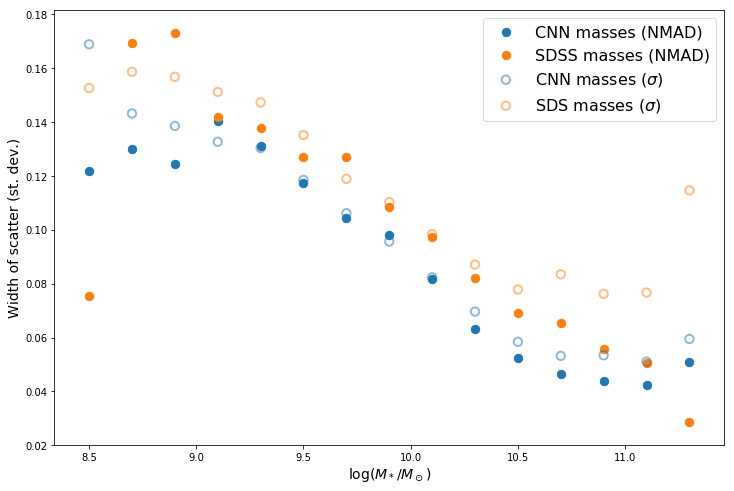

In [22]:
mass_bins = np.arange(8.5, 11.5, 0.2)
oh_pred_nmad = [nmad(df_tight.prediction[(df_tight.lgm_tot_p50 < m+0.1) & (df_tight.lgm_tot_p50 > m-0.1)]) for m in mass_bins]
oh_sdss_nmad = [nmad(df_tight.oh_p50[(df_tight.lgm_tot_p50 < m+0.1) & (df_tight.lgm_tot_p50 > m-0.1)]) for m in mass_bins]

oh_pred_sigma = [np.std(df_tight.prediction[(df_tight.lgm_tot_p50 < m+0.1) & (df_tight.lgm_tot_p50 > m-0.1)]) for m in mass_bins]
oh_sdss_sigma = [np.std(df_tight.oh_p50[(df_tight.lgm_tot_p50 < m+0.1) & (df_tight.lgm_tot_p50 > m-0.1)]) for m in mass_bins]

plt.figure(figsize=(12, 8))
plt.scatter(mass_bins, oh_pred_nmad, label='CNN masses (NMAD)', c='C0', s=70)
plt.scatter(mass_bins, oh_sdss_nmad, label='SDSS masses (NMAD)', c='C1', s=70)
plt.scatter(mass_bins, oh_pred_sigma, label='CNN masses ($\sigma$)', edgecolors='C0', linewidths=2, marker='o', facecolors='none', s=70, alpha=0.5)
plt.scatter(mass_bins, oh_sdss_sigma, label='SDS masses ($\sigma$)', edgecolors='C1', linewidths=2, marker='o', facecolors='none', s=70, alpha=0.5)


plt.legend(fontsize=16)
plt.xlabel('log($M_*/M_\odot$)', fontsize=14)
plt.ylabel('Width of scatter (st. dev.)', fontsize=14);

Relative scatter between CNN and SDSS

Text(9,1.3,'NMAD(Z_residuals) / NMAD(Z_true) = 0.836$\\pm$0.103')

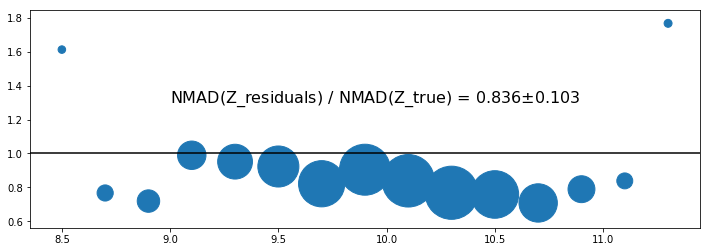

In [23]:
plt.figure(figsize=(12, 4))
num_mass_bins = np.sum([(df_tight.lgm_tot_p50 < m+0.1) & (df_tight.lgm_tot_p50 > m-0.1) for m in mass_bins], axis=1)

avg_scatter_ratio = np.average( np.array(oh_pred_nmad) / np.array(oh_sdss_nmad), weights=num_mass_bins)
std_mass_scatter_ratio = np.sqrt(np.average((np.array(oh_pred_nmad) / np.array(oh_sdss_nmad)-avg_scatter_ratio)**2, weights=num_mass_bins))


plt.scatter(mass_bins, np.array(oh_pred_nmad) / np.array(oh_sdss_nmad), c='C0', s=num_mass_bins)
plt.axhline(1, c='k')
plt.text(9.0, 1.3, f'NMAD(Z_residuals) / NMAD(Z_true) = {avg_scatter_ratio:.3f}$\pm${std_mass_scatter_ratio:.3f}', fontsize=16)

No handles with labels found to put in legend.


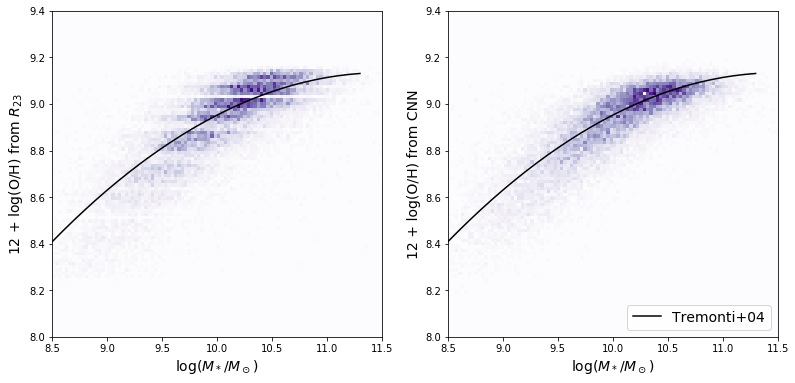

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 6))
*_, im = ax1.hist2d(df_tight.lgm_tot_p50, df_tight.oh_p50, bins=100, range=([8.5, 11.5], [8.0, 9.4]), cmin=0, cmax=50, cmap='Purples')

# Tremonti+04 equation 3
logm_bins = np.arange(8.5, 11.3, 0.1)
mmr = lambda logm: -1.492 + 1.847*logm -0.08026*logm**2
ax1.plot(logm_bins, mmr(logm_bins), c='k')


ax1.set_xlabel('log($M_*/M_\odot$)', fontsize=14)
ax1.set_ylabel('12 + log(O/H) from $R_{23}$', fontsize=14)

plt.legend(loc='lower right', fontsize=14)

*_, im = ax2.hist2d(df_tight.lgm_tot_p50, df_tight.prediction, bins=100, range=([8.5, 11.5], [8.0, 9.4]), cmin=0, cmax=50, cmap='Purples')

ax2.plot(logm_bins, mmr(logm_bins), c='k', label='Tremonti+04')
ax2.set_xlabel('log($M_*/M_\odot$)', fontsize=14)
plt.ylabel('12 + log(O/H) from CNN', fontsize=14)

plt.legend(loc='lower right', fontsize=14)

# Check fundamental metallictiy relation (FMR)
Lara-Lopez et al. (2010) and Mannucci et al. (2010) independently found that a thin 2d surface exists in the SFR-metallicity-$M_*$ volume.

In [25]:
import corner

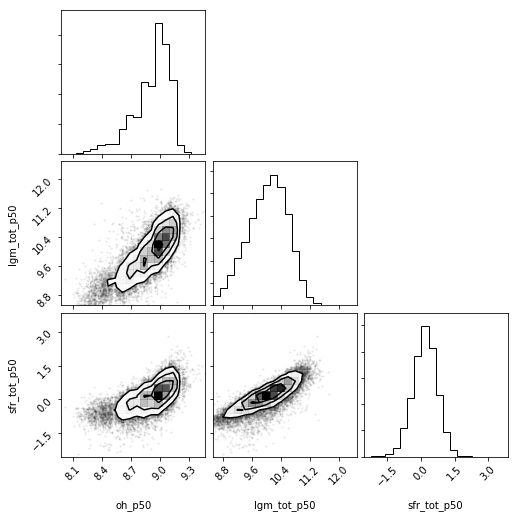

In [26]:
corner.corner(df[['oh_p50', 'lgm_tot_p50', 'sfr_tot_p50']]);

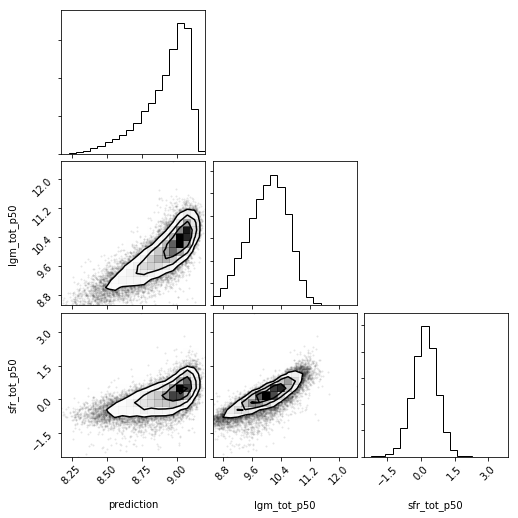

In [27]:
corner.corner(df[['prediction', 'lgm_tot_p50', 'sfr_tot_p50']]);

## compare with Mannucci+10

later...

# Color information

In [28]:
gmi = pd.DataFrame(full_df.modelMag_g - full_df.modelMag_i, columns=['gmi'])

In [29]:
df2 = preds.join(full_df[['z', 'lgm_tot_p50', 'sfr_tot_p50']], how='left').join(gmi, how='left')
df2.describe()

,oh_p50,prediction,z,lgm_tot_p50,sfr_tot_p50,gmi
count,20469.000000,20469.000000,20469.000000,20469.000000,20469.000000,20469.000000
mean,8.905762,8.907596,0.077032,8.053379,0.155715,0.906298
std,0.200183,0.174791,0.039441,139.908615,0.556713,0.253394
min,7.896335,8.129671,0.020014,-9999.000000,-4.296250,-6.654230
25%,8.808699,8.816455,0.047412,9.639691,-0.189364,0.735880
50%,8.955700,8.957461,0.070864,10.058110,0.171290,0.898220
75%,9.054276,9.039477,0.098012,10.415460,0.527031,1.070820
max,9.465558,9.199911,0.364123,12.492280,3.875005,5.428870


In [30]:
# only select high-mass + g-i > -2 and g-i < 3
df2 = df2[(df2.lgm_tot_p50 > 8.5) & (df2.gmi > -2) & (df2.gmi < 3)].copy()
df2.describe()

,oh_p50,prediction,z,lgm_tot_p50,sfr_tot_p50,gmi
count,20353.000000,20353.000000,20353.000000,20353.000000,20353.000000,20353.000000
mean,8.908435,8.910073,0.077256,10.018184,0.161406,0.909813
std,0.196276,0.170984,0.039315,0.549034,0.546751,0.229603
min,7.975870,8.177104,0.020014,8.509598,-2.562046,-0.639970
25%,8.810446,8.818902,0.047697,9.647556,-0.181449,0.739450
50%,8.956769,8.958316,0.071072,10.062800,0.174883,0.899890
75%,9.054508,9.039809,0.098245,10.417470,0.528808,1.071400
max,9.465558,9.199911,0.314083,12.492280,3.875005,2.819700


In [31]:
# reduce outliers
df2_tight = df2[(df2.oh_p50 > 8.25) & (df2.oh_p50 < 9.15)]
df2_tight.describe()

,oh_p50,prediction,z,lgm_tot_p50,sfr_tot_p50,gmi
count,19620.000000,19620.000000,19620.000000,19620.000000,19620.000000,19620.000000
mean,8.902569,8.906345,0.076769,10.001607,0.143841,0.904722
std,0.186693,0.166538,0.038600,0.535545,0.533817,0.226589
min,8.250810,8.187387,0.020014,8.509598,-2.562046,-0.639970
25%,8.807445,8.815435,0.047694,9.638859,-0.191064,0.735677
50%,8.951436,8.952378,0.070844,10.043585,0.159404,0.892565
75%,9.049990,9.034609,0.097561,10.391873,0.501658,1.062085
max,9.149965,9.180563,0.314083,12.492280,3.875005,2.819700


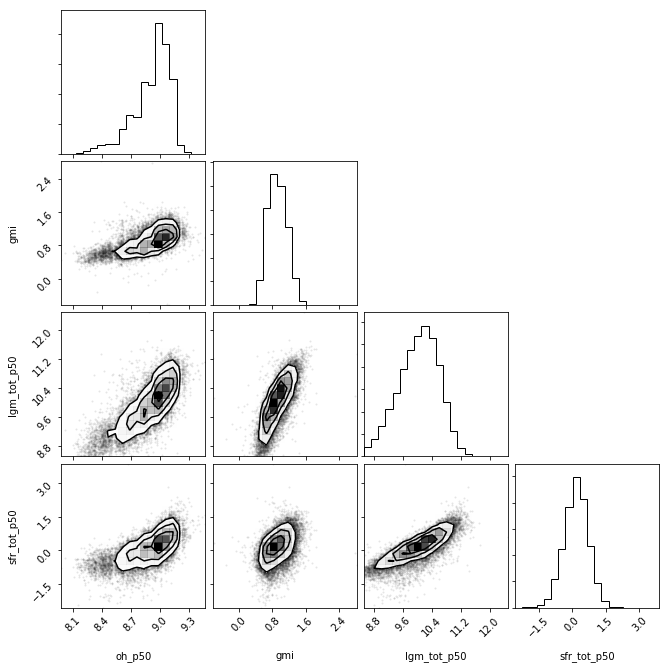

In [32]:
corner.corner(df2[['oh_p50', 'gmi', 'lgm_tot_p50', 'sfr_tot_p50']]);

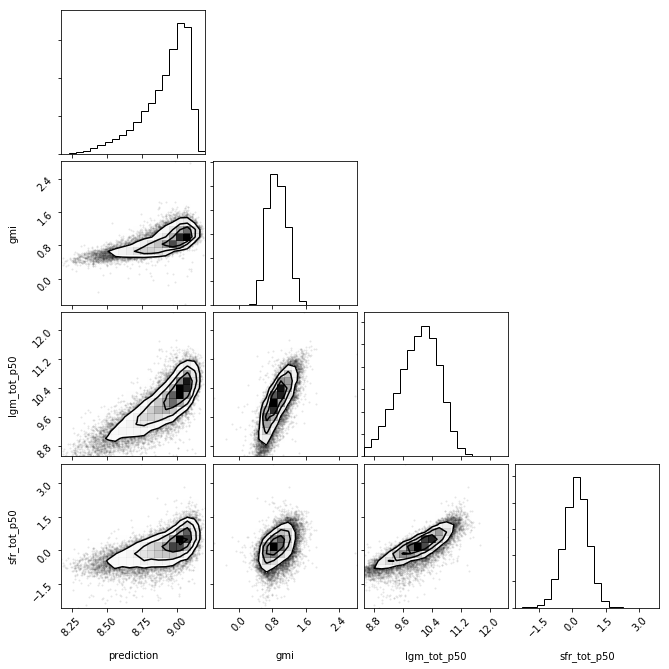

In [33]:
corner.corner(df2[['prediction', 'gmi', 'lgm_tot_p50', 'sfr_tot_p50']]);

## slices of color

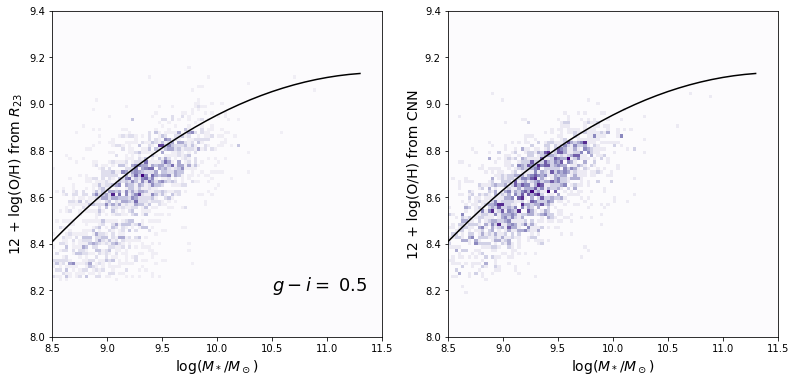

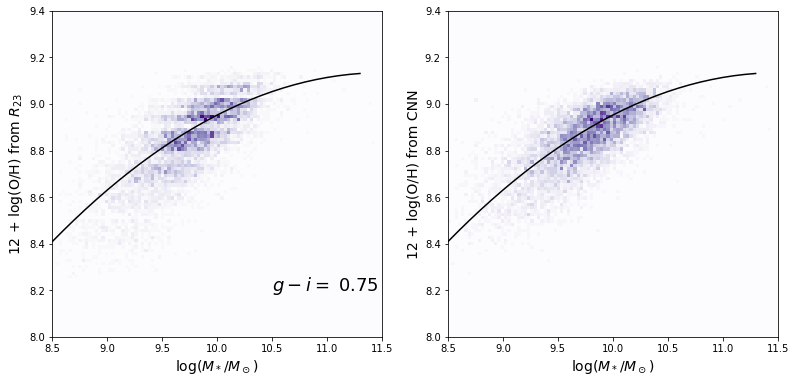

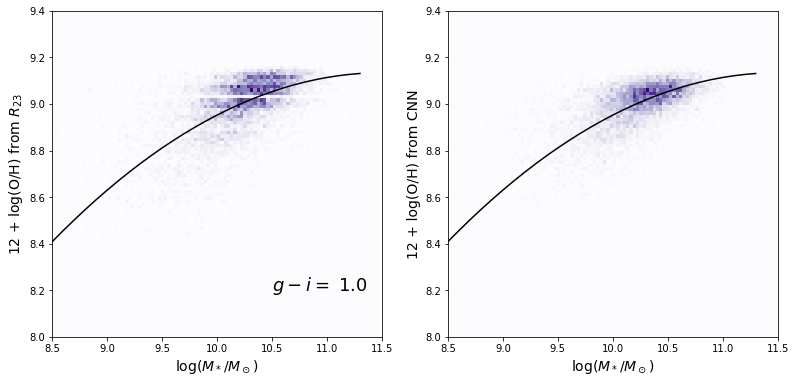

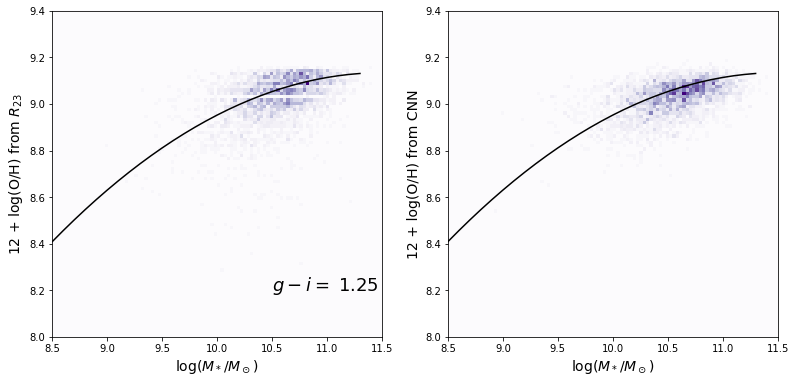

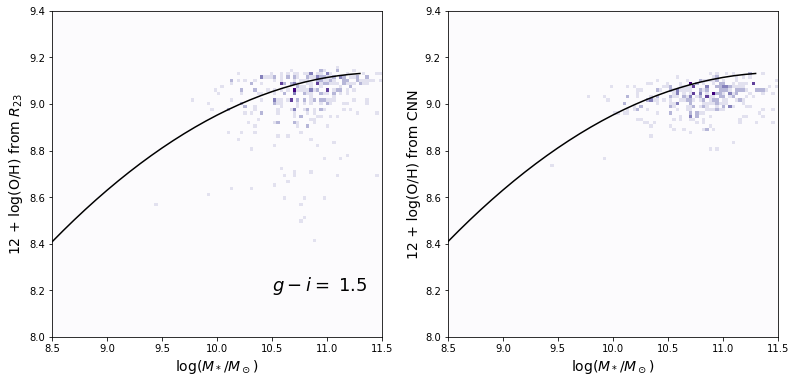

In [34]:
for color in np.arange(0.5, 1.75, 0.25):
    color_range = (df2_tight.gmi > color - 0.125) & (df2_tight.gmi < color + 0.125)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 6))
    
    
    *_, im = ax1.hist2d(df2_tight[color_range].lgm_tot_p50, 
                        df2_tight[color_range].oh_p50, 
                        bins=100, range=([8.5, 11.5], [8.0, 9.4]), cmin=0, cmax=50, cmap='Purples')
    
    ax1.plot(logm_bins, mmr(logm_bins), c='k')

    ax1.set_xlabel('log($M_*/M_\odot$)', fontsize=14)
    ax1.set_ylabel('12 + log(O/H) from $R_{23}$', fontsize=14)
    
    ax1.text(10.5, 8.2, f'$g-i = $ {color}', fontsize=18)


    *_, im = ax2.hist2d(df2_tight[color_range].lgm_tot_p50, 
                        df2_tight[color_range].prediction, 
                        bins=100, range=([8.5, 11.5], [8.0, 9.4]), cmin=0, cmax=50, cmap='Purples')

    ax2.plot(logm_bins, mmr(logm_bins), c='k')
    ax2.set_xlabel('log($M_*/M_\odot$)', fontsize=14)
    plt.ylabel('12 + log(O/H) from CNN', fontsize=14)


    plt.show()

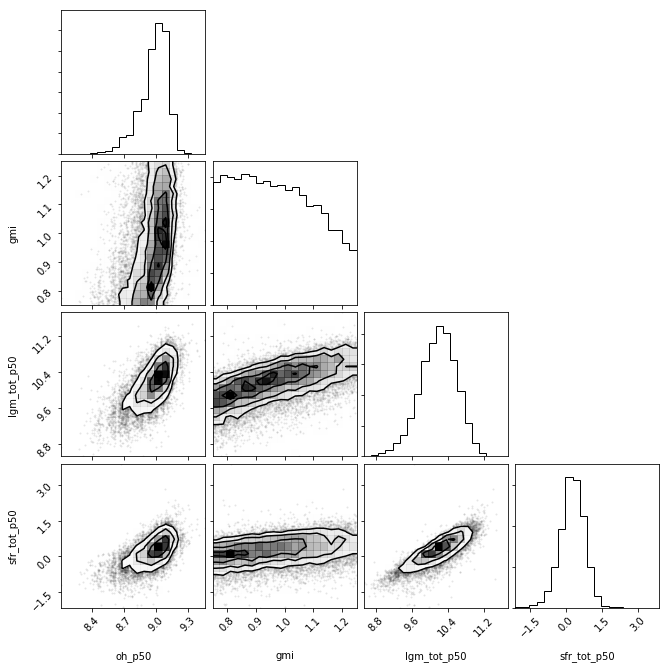

In [35]:
corner.corner(df2[(df2.gmi < 1.25) & (df2.gmi > 0.75)][['oh_p50', 'gmi', 'lgm_tot_p50', 'sfr_tot_p50']]);

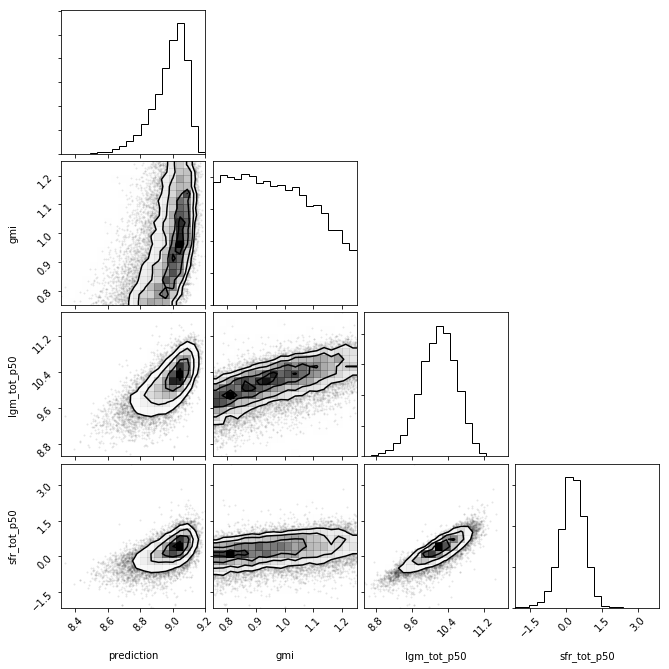

In [36]:
corner.corner(df2[(df2.gmi < 1.25) & (df2.gmi > 0.75)][['prediction', 'gmi', 'lgm_tot_p50', 'sfr_tot_p50']]);

## Slices of SFR

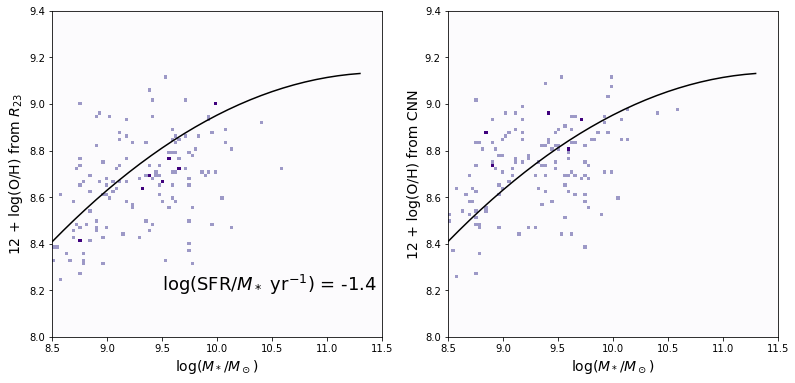

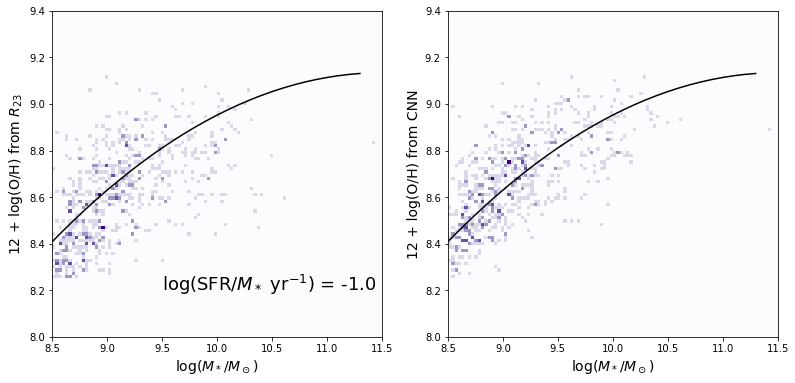

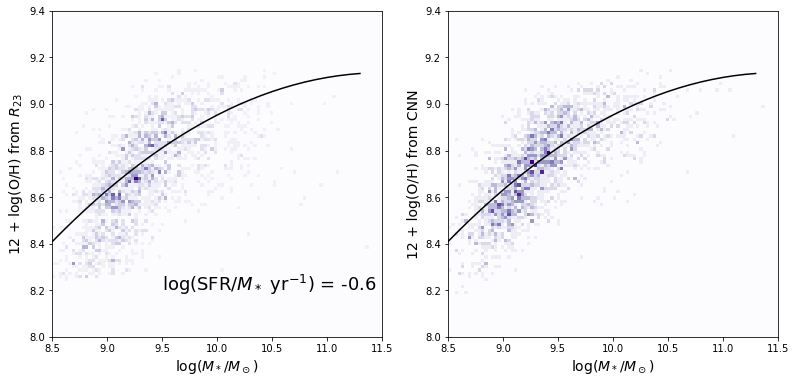

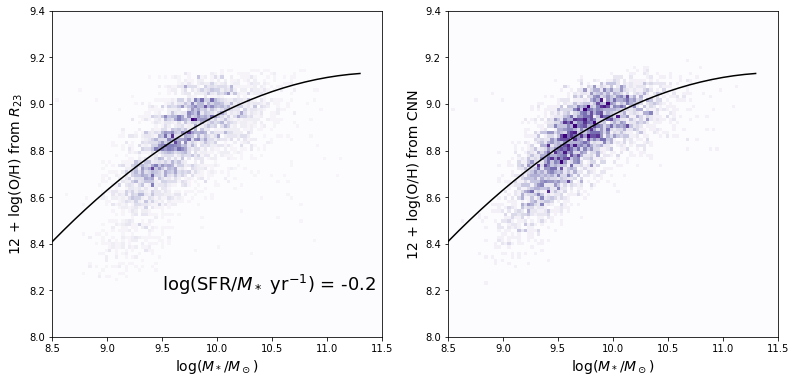

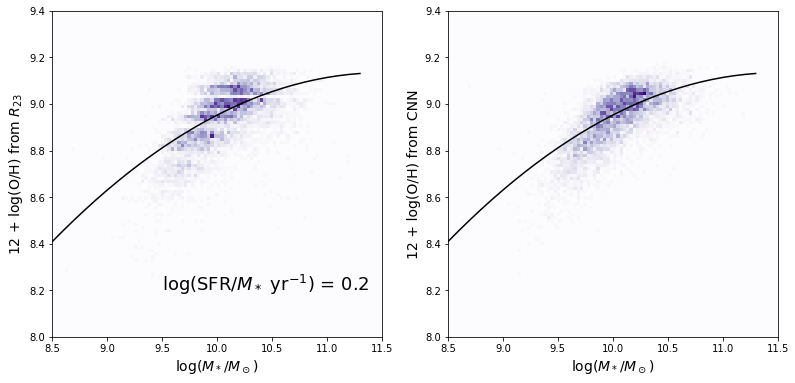

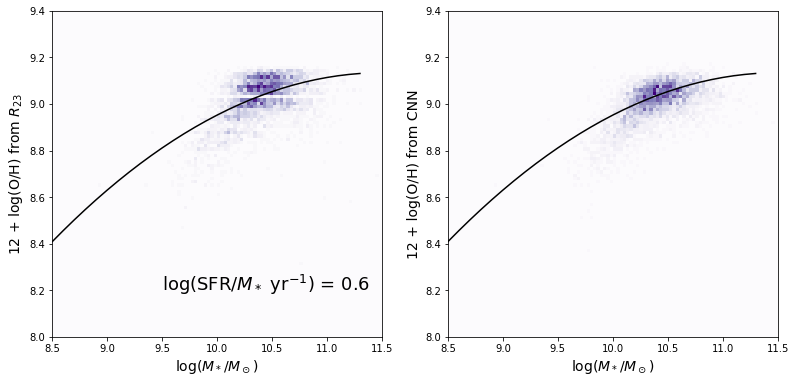

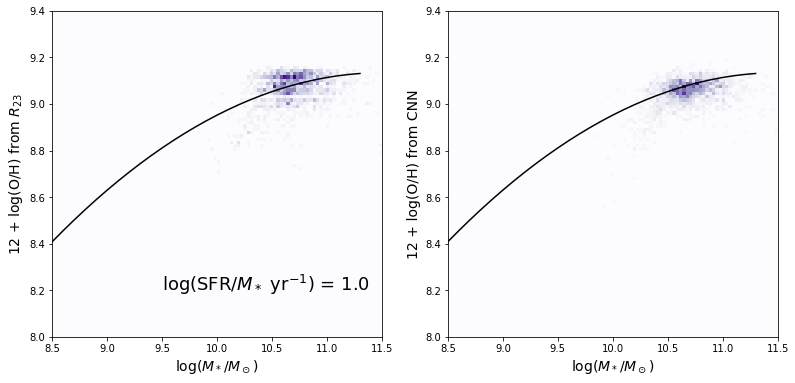

In [37]:
for sfr in np.arange(-1.4, 1.4, 0.4):
    sfr_range = (df2_tight.sfr_tot_p50 > sfr - 0.2) & (df2_tight.sfr_tot_p50 < sfr + 0.2)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 6))
    
    
    *_, im = ax1.hist2d(df2_tight[sfr_range].lgm_tot_p50, 
                        df2_tight[sfr_range].oh_p50, 
                        bins=100, range=([8.5, 11.5], [8.0, 9.4]), cmin=0, cmax=50, cmap='Purples')
    
    ax1.plot(logm_bins, mmr(logm_bins), c='k')

    ax1.set_xlabel('log($M_*/M_\odot$)', fontsize=14)
    ax1.set_ylabel('12 + log(O/H) from $R_{23}$', fontsize=14)
    
    ax1.text(9.5, 8.2, f'log(SFR/$M_*$ yr$^{{-1}}$) = {sfr:.1f}', fontsize=18)


    *_, im = ax2.hist2d(df2_tight[sfr_range].lgm_tot_p50, 
                        df2_tight[sfr_range].prediction, 
                        bins=100, range=([8.5, 11.5], [8.0, 9.4]), cmin=0, cmax=50, cmap='Purples')

    ax2.plot(logm_bins, mmr(logm_bins), c='k')
    ax2.set_xlabel('log($M_*/M_\odot$)', fontsize=14)
    plt.ylabel('12 + log(O/H) from CNN', fontsize=14)


    plt.show()

# What if we use predicted stellar mass?

In [38]:
df_mass = pd.read_csv(f'{PATH}/catalogs/predictions-mass-metal.csv', index_col=0)
df_mass.describe()

,lgm_tot_p50,cnn_lgm,oh_p50,cnn_oh
count,20409.000000,20409.000000,20409.000000,20409.000000
mean,10.010444,10.010048,8.906145,8.905678
std,0.556114,0.501938,0.198043,0.173846
min,6.318501,8.358475,7.996698,8.163652
25%,9.643638,9.670511,8.807751,8.812772
50%,10.058900,10.056254,8.956323,8.953806
75%,10.413320,10.390510,9.052710,9.037653
max,12.492280,11.541730,9.465558,9.190277


## How good/bad is the predicted mass?

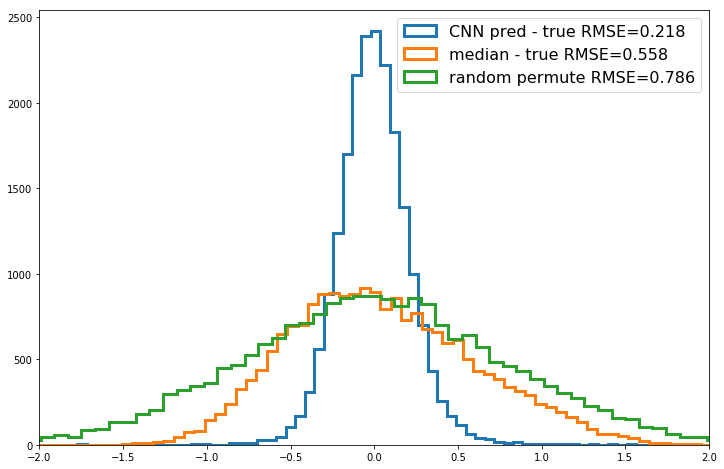

In [39]:
mass_rmse = np.sqrt(np.mean((df_mass.lgm_tot_p50 - df_mass.cnn_lgm)**2))

median_prediction_rmse = np.sqrt(np.mean((np.median(df_mass.lgm_tot_p50) - df_mass.lgm_tot_p50)**2))

randomized_mass = df_mass.lgm_tot_p50 - np.random.permutation(df_mass.lgm_tot_p50)
random_pred_rmse = np.sqrt(np.mean(randomized_mass**2))

plt.figure(figsize=(12, 8))
plt.hist(df_mass.cnn_lgm - df_mass.lgm_tot_p50, bins=100, histtype='step', align='mid', lw=3, label=f'CNN pred - true RMSE={mass_rmse:.3f}')
plt.hist(np.median(df_mass.lgm_tot_p50) - df_mass.lgm_tot_p50, bins=100, histtype='step', lw=3, align='mid', label=f'median - true RMSE={median_prediction_rmse:.3f}')
plt.hist(randomized_mass, bins=100, histtype='step', lw=3, align='mid', label=f'random permute RMSE={random_pred_rmse:.3f}')

plt.xlim(-2, 2)
plt.legend(fontsize=16)

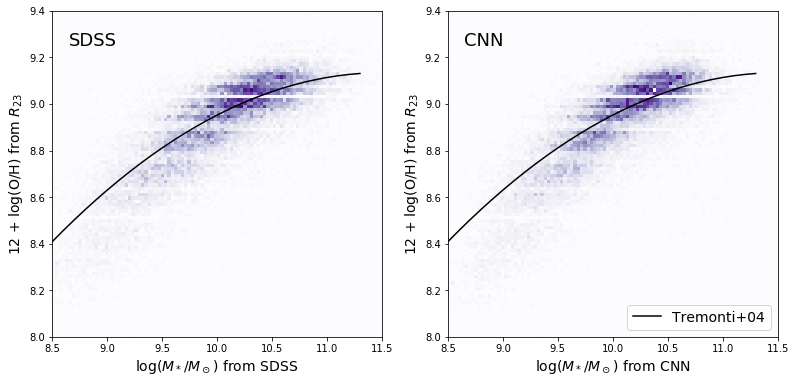

In [40]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 6))
*_, im = ax1.hist2d(df_mass.lgm_tot_p50, df_mass.oh_p50, bins=100, range=([8.5, 11.5], [8.0, 9.4]), cmin=0, cmax=50, cmap='Purples')

# Tremonti+04 equation 3
logm_bins = np.arange(8.5, 11.3, 0.1)
mmr = lambda logm: -1.492 + 1.847*logm -0.08026*logm**2
ax1.plot(logm_bins, mmr(logm_bins), c='k')


ax1.set_xlabel('log($M_*/M_\odot$) from SDSS', fontsize=14)
ax1.set_ylabel('12 + log(O/H) from $R_{23}$', fontsize=14)
ax1.text(8.65, 9.25, 'SDSS', fontsize=18)

*_, im = ax2.hist2d(df_mass.cnn_lgm, df_mass.oh_p50, bins=100, range=([8.5, 11.5], [8.0, 9.4]), cmin=0, cmax=50, cmap='Purples')

ax2.plot(logm_bins, mmr(logm_bins), c='k', label='Tremonti+04')
ax2.set_xlabel('log($M_*/M_\odot$) from CNN', fontsize=14)
ax2.text(8.65, 9.25, 'CNN', fontsize=18)

plt.ylabel('12 + log(O/H) from $R_{23}$', fontsize=14)

plt.legend(loc='lower right', fontsize=14)

plt.savefig('MMR_predicting-mass.png', dpi=200)

## Looks strange -- the masses seem to be fairly correlated but  maybe further away from the MMR median

This makes me less confident that our CNN is seeing the mass-metallicity relationship. It could be that
1. metallicity is easier to predict than stellar mass (unlikely? but possible if shape or size is more important than color for predicting metallicity, e.g., irregulars and dwarfs tend to be more metal poor)
2. we just see a tightening of all relationships since the network wants to predict a smaller range than is representative

### Scatter in mass per metallicity bin

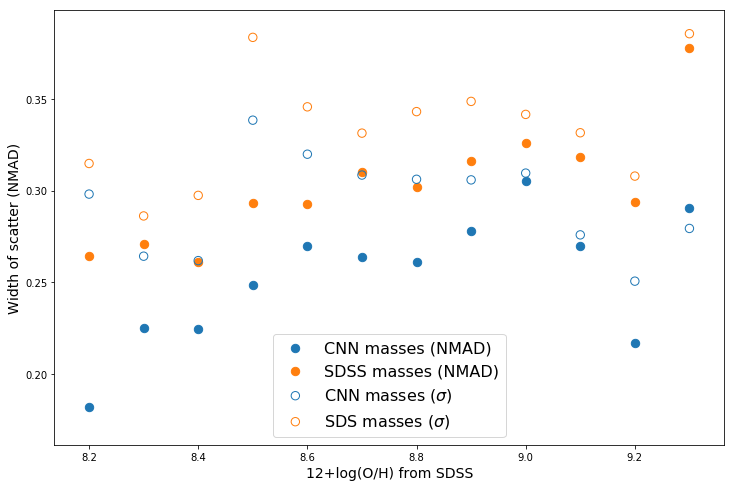

In [41]:
metal_bins = np.arange(8.2, 9.3, 0.1)

mass_pred_nmad = [nmad(df_mass.cnn_lgm[(df_mass.oh_p50 < z+0.05) & (df_mass.oh_p50 > z-0.05)]) for z in metal_bins]
mass_sdss_nmad = [nmad(df_mass.lgm_tot_p50[(df_mass.oh_p50 < z+0.05) & (df_mass.oh_p50 > z-0.05)]) for z in metal_bins]
mass_pred_sigma = [np.std(df_mass.cnn_lgm[(df_mass.oh_p50 < z+0.05) & (df_mass.oh_p50 > z-0.05)]) for z in metal_bins]
mass_sdss_sigma = [np.std(df_mass.lgm_tot_p50[(df_mass.oh_p50 < z+0.05) & (df_mass.oh_p50 > z-0.05)]) for z in metal_bins]

plt.figure(figsize=(12, 8))

plt.scatter(metal_bins, mass_pred_nmad, label='CNN masses (NMAD)', c='C0', s=70)
plt.scatter(metal_bins, mass_sdss_nmad, label='SDSS masses (NMAD)', c='C1', s=70)

plt.scatter(metal_bins, mass_pred_sigma, label='CNN masses ($\sigma$)', edgecolors='C0', marker='o', facecolors='none', s=70)
plt.scatter(metal_bins, mass_sdss_sigma, label='SDS masses ($\sigma$)', edgecolors='C1', marker='o', facecolors='none', s=70)


plt.legend(fontsize=16)
plt.ylabel('Width of scatter (NMAD)', fontsize=14)
plt.xlabel('12+log(O/H) from SDSS', fontsize=14);

### Relative scatter

Text(8.15,0.95,'Scatter(CNN) / Scatter(SDSS) = 0.877$\\pm$0.045')

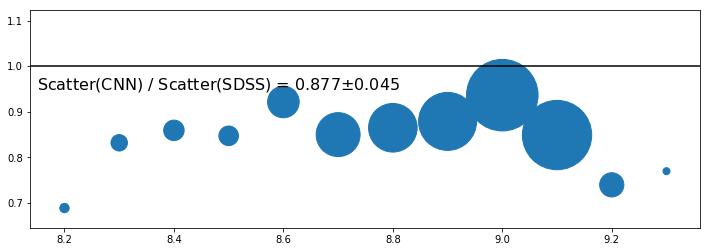

In [42]:
plt.figure(figsize=(12, 4))
num_metal_bins = np.sum([(df_mass.oh_p50 < z+0.05) & (df_mass.oh_p50 > z-0.05) for z in metal_bins], axis=1)

avg_mass_scatter_ratio = np.average( np.array(mass_pred_nmad) / np.array(mass_sdss_nmad), weights=num_metal_bins)
std_mass_scatter_ratio = np.sqrt(np.average((np.array(mass_pred_nmad) / np.array(mass_sdss_nmad)-avg_mass_scatter_ratio)**2, weights=num_metal_bins))

plt.scatter(metal_bins, np.array(mass_pred_nmad) / np.array(mass_sdss_nmad), c='C0', s=num_metal_bins)
plt.axhline(1, c='k')
plt.text(8.15, 0.95, f'Scatter(CNN) / Scatter(SDSS) = {avg_mass_scatter_ratio:.3f}$\pm${std_mass_scatter_ratio:.3f}', fontsize=16)

### overall standard deviation?

In [43]:
print(f'Standard deviation in delta mass: {np.std(df_mass.lgm_tot_p50 - df_mass.cnn_lgm):.4f}')
print(f'NMAD in delta mass: {nmad(df_mass.lgm_tot_p50 - df_mass.cnn_lgm):.4f}')

Standard deviation in delta mass: 0.2176
NMAD in delta mass: 0.1898


### Scatter in metallicity per mass bin

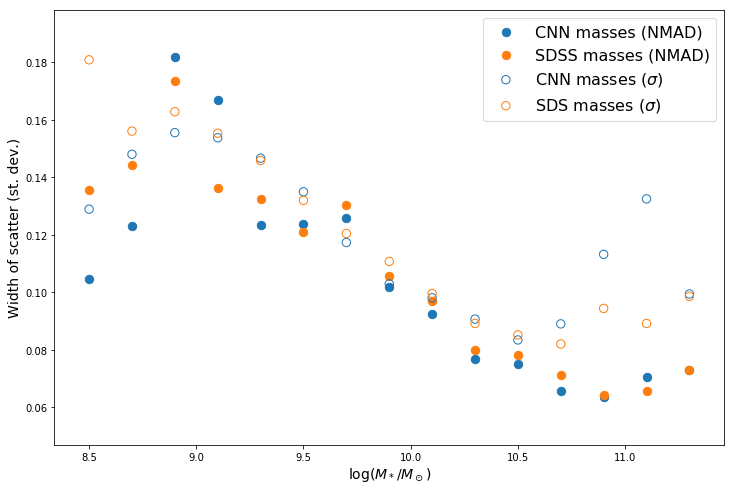

In [44]:
mass_bins = np.arange(8.5, 11.5, 0.2)
oh_pred_nmad = [nmad(df_mass.oh_p50[(df_mass.cnn_lgm < m+0.1) & (df_mass.cnn_lgm > m-0.1)]) for m in mass_bins]
oh_sdss_nmad = [nmad(df_mass.oh_p50[(df_mass.lgm_tot_p50 < m+0.1) & (df_mass.lgm_tot_p50 > m-0.1)]) for m in mass_bins]

oh_pred_sigma = [np.std(df_mass.oh_p50[(df_mass.cnn_lgm < m+0.1) & (df_mass.cnn_lgm > m-0.1)]) for m in mass_bins]
oh_sdss_sigma = [np.std(df_mass.oh_p50[(df_mass.lgm_tot_p50 < m+0.1) & (df_mass.lgm_tot_p50 > m-0.1)]) for m in mass_bins]

plt.figure(figsize=(12, 8))
plt.scatter(mass_bins, oh_pred_nmad, label='CNN masses (NMAD)', c='C0', s=70)
plt.scatter(mass_bins, oh_sdss_nmad, label='SDSS masses (NMAD)', c='C1', s=70)
plt.scatter(mass_bins, oh_pred_sigma, label='CNN masses ($\sigma$)', edgecolors='C0', marker='o', facecolors='none', s=70)
plt.scatter(mass_bins, oh_sdss_sigma, label='SDS masses ($\sigma$)', edgecolors='C1', marker='o', facecolors='none', s=70)


plt.legend(fontsize=16)
plt.xlabel('log($M_*/M_\odot$)', fontsize=14)
plt.ylabel('Width of scatter (st. dev.)', fontsize=14);

# Conclusions?

Despite the predicted (CNN) masses being much lower in scatter than the true (SDSS) masses, the corresponding metallicity relation does **not** change in scatter.

E.G. mentioned this in an email:

>The data you’re feeding the CNN may contain more information on stellar mass than on metallicity itself.  When you train against true metallicities, it would effectively be using the mass-metallicity relation.  Then when you apply that to a test set, the test set has scatter in metallicity vs. mass that the CNN would not be able to predict, leading the CNN metallicity predictions to correlate more strongly with stellar mass than the actual metallicities do.   I would think a useful comparison for this would be to instead train on stellar mass and then compare scatter in predicted mass versus true to see if that is even smaller.

## Perhaps there are no new trends in the MMR/FMR
If indeed the CNN is primarily seeing the mass, then our observed trends are still explainable. The CNN will fail to predict the full range of masses, causing the **slope of the MMR to be steeper**. 

![](MMR_predicting-mass.png)

When predicting *metallicity*, then again the CNN will fail to predict the full range of values, and thus cause the MMR **slope to be shallower**.

![](MMR_predicting-metallicity.png)

In both cases the correlation will appear **tighter** because the network is basically understanding the mass to predict metallicity, which becomes apparent in the MMR.

## Another test: simulating the CNN seeing the mass and then "predicting" metallicity using the MMR

If indeed the CNN mostly sees the mass (from, e.g., color or size), then it makes sense that its metallicity predictions correlate strongly with the "true" mass, since the metallictiy predictions are simply stellar mass predictions that are then fed through the MMR. Let's use the predicted masse sand feed them through the MMR, and see how that compares. If that scatter is similar to the actual metallicity predictions (sigma = 0.085, NMAD=0.067), then we may be confident that we're seeing nothing more than a propagated signal from predicting mass.

In [45]:
df_mass['oh_mmr'] = mmr(df_mass.cnn_lgm)

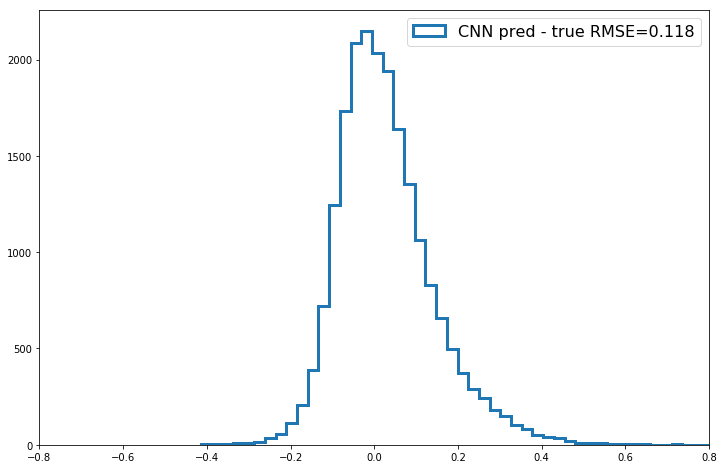

In [46]:
mmr_metal_rmse = np.sqrt(np.mean((df_mass.oh_mmr - df_mass.oh_p50)**2))

plt.figure(figsize=(12, 8))
plt.hist(df_mass.oh_mmr - df_mass.oh_p50, bins=50, histtype='step', align='mid', lw=3, label=f'CNN pred - true RMSE={mmr_metal_rmse:.3f}')

plt.xlim(-0.8, 0.8)
plt.legend(fontsize=16)

In [47]:
print(f'Standard deviation in simulated delta metallicity: {np.std(df_mass.oh_mmr - df_mass.oh_p50):.4f}')
print(f'NMAD in simulated delta metallicity: {nmad(df_mass.oh_mmr - df_mass.oh_p50):.4f}')

Standard deviation in simulated delta metallicity: 0.1149
NMAD in simulated delta metallicity: 0.0995


## Plot everything using the predicted masses and predicted metallicities

In [118]:
import matplotlib
def plot_comparison_with_marginals(y_test, p_test, which='metallicity', figname=None):
    
    
    if which == 'metallicity':
        bmin, bmax, step = 8.2, 9.3, 0.1
        xlabel = 'SDSS $Z$ [12 + log(O/H)]'
        ylabel = 'Predicted $Z$ [12 + log(O/H)]'
        max_scatter = 0.3
    elif which == 'mass':
        bmin, bmax, step = 8.4, 11.2, 0.2
        xlabel = 'SDSS log($M_*/M_\odot$)'
        ylabel = 'Predicted log($M_*/M_\odot$)'
        max_scatter = 0.6
    
    gs = matplotlib.gridspec.GridSpec(20, 20)   
    fig = plt.figure(figsize=(8, 8))
    
    ax = fig.add_subplot(gs[4:, 2:18])
    
    # plot main histogram
    *_, im = ax.hist2d(y_test, p_test, bins=100, range=[[bmin, bmax], [bmin, bmax]], cmap='cubehelix_r', norm=matplotlib.colors.LogNorm(vmin=1, vmax=100), alpha=1)
            
        
    ax.plot([bmin, bmax], [bmin, bmax], c='k', ls='--', lw=3)
    
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    
    ax.text(bmin + 0.05, bmax - 2*step, f'Resnet-34 \n' r'$128\times 128$', fontsize=16)
    
    # add colorbar
    ax_cb = fig.add_subplot(gs[4:, 19:])
    cb = fig.colorbar(im, cax=ax_cb);
    cb.set_label('Number', fontsize=14)
    
    
    # add top margin plot
    ax_marg = fig.add_subplot(gs[:4, 2:18])

    y_bins = np.arange(bmin, bmax, step)
    rmse_bins = [np.sqrt(np.mean(((p_test - y_test)[(y_test > y - step/2) & (y_test < y + step/2)])**2)) for y in y_bins]
    num_in_bins = np.sum([(y_test > y - step/2) & (y_test < y + step/2) for y in y_bins], axis=1)
    rmse_error = np.sqrt(np.mean(((p_test - y_test)**2)))
    ax_marg.scatter(y_bins, rmse_bins, marker='o', c='C0', s=num_in_bins/30, label=f'<RMSE>={rmse_error:.4f}')

    nmad_bins = [np.sqrt(nmad(((p_test - y_test)[(y_test > y - step/2) & (y_test < y + step/2)])**2)) for y in y_bins]
    nmad_error = nmad(p_test - y_test)
    
    ax_marg.scatter(y_bins, nmad_bins, marker='o', c='C1', s=num_in_bins/30, label=f'<NMAD>={nmad_error:.4f}')
    
    ax_marg.set_ylabel('Residual\nscatter', fontsize=14)
    ax_marg.legend(fontsize=12, framealpha=0.0, frameon=False, loc='upper right')
    ax_marg.set_ylim(0, max_scatter)
    ax_marg.set_xlim(bmin, bmax)
    ax_marg.set_xticklabels([])
    
    # include mean RMSE  
    ax_marg.axhline(rmse_error, ls='-', c='C0')
    ax_marg.axhline(nmad_error, ls='-', c='C1')
    
    if not figname:
        fig.savefig(f'{PATH}/results/single-sz128_{which}_pred-vs-SDSS_with-marginals.pdf', dpi=300)
    else:
        fig.savefig(figname, dpi=300)
    


### Predicted vs. true mass

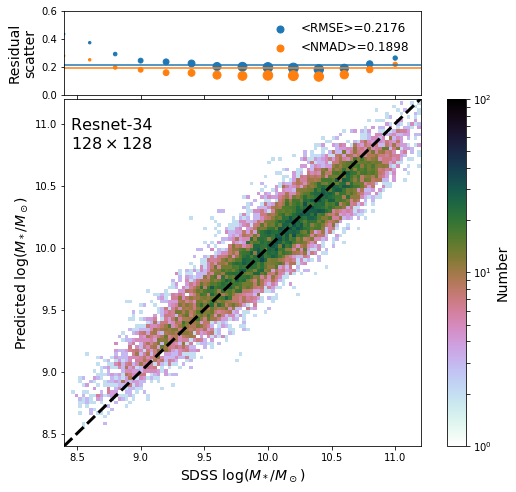

In [114]:
plot_comparison_with_marginals(df_mass.lgm_tot_p50.values, df_mass.cnn_lgm.values, which='mass')

### Predicted vs. true metallicity

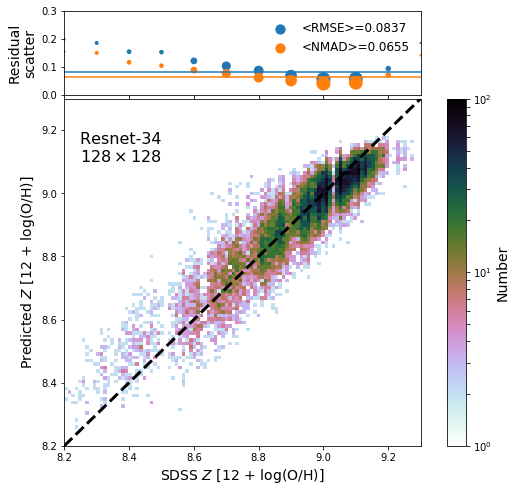

In [117]:
plot_comparison_with_marginals(df_mass.oh_p50.values, df_mass.cnn_oh.values, which='metallicity')

### $Z$ using MMR on predicte $M_*$ vs. true metallicity

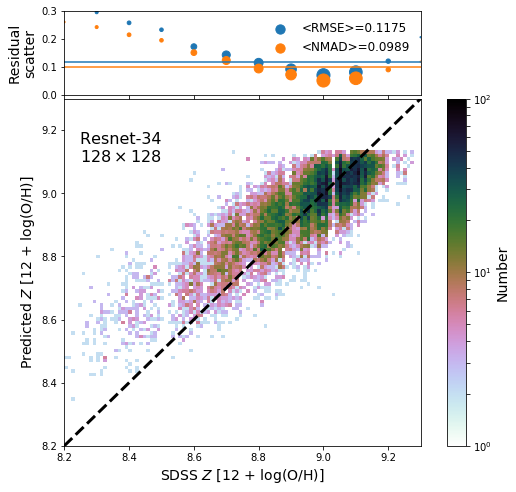

In [120]:
plot_comparison_with_marginals(df_mass.oh_p50, mmr(df_mass.lgm_tot_p50.values), which='metallicity',
                               figname=f'{PATH}/results/single-sz128_MMR-metallicity_pred-vs-SDSS_with-marginals.pdf')

### MMR using all combinations of 